In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mouse_metadata.csv")
df2 = pd.read_csv("Study_results.csv")

In [3]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
mouse_data = df2.merge(df, on = "Mouse ID", how = "left")

In [6]:
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
mouse_count = df["Mouse ID"].nunique()

In [10]:
mouse_count

249

In [11]:
duplicate_mouse_ids = mouse_data.loc[mouse_data.duplicated(['Mouse ID', 'Timepoint']), "Mouse ID"].unique()

In [12]:
duplicate_mouse_ids

array(['g989'], dtype=object)

In [13]:
duplicate_mouse_data = mouse_data.loc[mouse_data['Mouse ID'].isin(duplicate_mouse_ids)]

In [14]:
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
cleaned_mouse_data = mouse_data.loc[mouse_data['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [16]:
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
mouse_count = cleaned_mouse_data['Mouse ID'].nunique()

In [19]:
mouse_count

248

# Summary statistics 

In [20]:
grouped_mouse_data = cleaned_mouse_data.groupby("Drug Regimen")

In [26]:
mean = grouped_mouse_data.mean()["Tumor Volume (mm3)"]

In [27]:
median = grouped_mouse_data.median()["Tumor Volume (mm3)"]

In [28]:
variance = grouped_mouse_data.var()["Tumor Volume (mm3)"]

In [30]:
standard_deviation = grouped_mouse_data.std()["Tumor Volume (mm3)"]

In [31]:
SEM = grouped_mouse_data.sem()["Tumor Volume (mm3)"]

In [33]:
stats_summary = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance Tumor Volume": variance,"Standard Deviation Tumor Volume": standard_deviation, "SEM Tumor Volume": SEM})

In [34]:
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts 

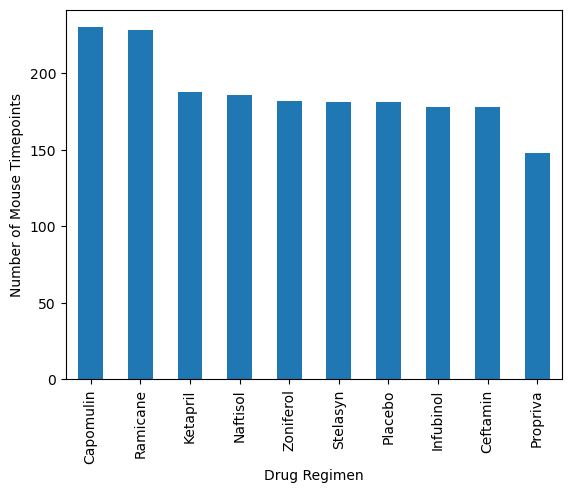

In [35]:
counts = cleaned_mouse_data["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.show()

In [37]:
plt.bar( x_axis, cleaned_mouse_data["Timepoint"], facecolor = "blue", alpha = 0.8, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.xticks(cleaned_mouse_data["Drug Regimen"], rotation = "vertical")
plt.show()

NameError: name 'x_axis' is not defined

# Pie Charts 

# Quartiles, outliers, Box Plot 

# Line Plot and Scatter Plot 

# Correlation and Regression 